In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

plt.style.use('default')

In [80]:
MAX_POP = 1939

In [81]:
R10 = '../quantum/1663732135422_arahama/state_30_7_10/survivorsPerSim_1x10.csv'
R100 = '../quantum/1663732488515_arahama/state_30_7_100/survivorsPerSim_1x100.csv'
R200 = '../quantum/1663734377373_arahama/state_30_7_200/survivorsPerSim_1x200.csv'

R10_FULL = '../quantum/1663737410487_arahama/state_30_7_10/survivorsPerSim_1x10.csv'
R100_FULL = '../quantum/1663737645538_arahama/state_30_7_100/survivorsPerSim_1x100.csv'
R200_FULL = '../quantum/1663744313929_arahama/state_30_7_200/survivorsPerSim_1x200.csv'

In [82]:
df10 = pd.read_csv(R10, header=None)
df100 = pd.read_csv(R100, header=None)
df200 = pd.read_csv(R200, header=None)

df10_f = pd.read_csv(R10_FULL, header=None)
df100_f = pd.read_csv(R100_FULL, header=None)
df200_f = pd.read_csv(R200_FULL, header=None)

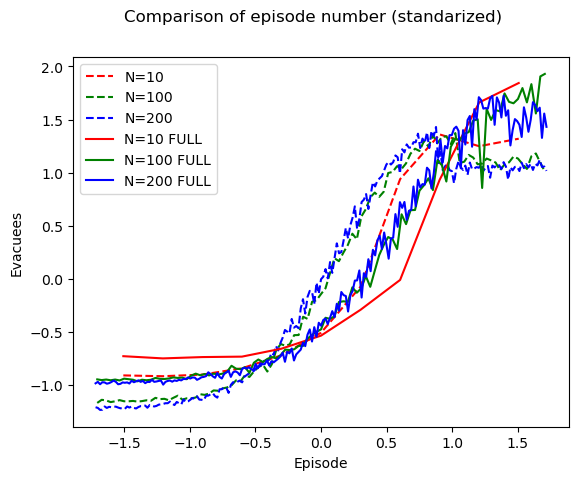

In [83]:
# copy the data
df10_z_scaled = df10.copy()
df100_z_scaled = df100.copy()
df200_z_scaled = df200.copy()

df10_f_z_scaled = df10_f.copy()
df100_f_z_scaled = df100_f.copy()
df200_f_z_scaled = df200_f.copy()

# apply normalization technique to Column 0
for i in [0,1]:
    df10_z_scaled[i] = (df10_z_scaled[i] - df10_z_scaled[i].mean()) / df10_z_scaled[i].std()
    df100_z_scaled[i] = (df100_z_scaled[i] - df100_z_scaled[i].mean()) / df100_z_scaled[i].std()
    df200_z_scaled[i] = (df200_z_scaled[i] - df200_z_scaled[i].mean()) / df200_z_scaled[i].std()
    
    df10_f_z_scaled[i] = (df10_f_z_scaled[i] - df10_f_z_scaled[i].mean()) / df10_f_z_scaled[i].std()
    df100_f_z_scaled[i] = (df100_f_z_scaled[i] - df100_f_z_scaled[i].mean()) / df100_f_z_scaled[i].std()
    df200_f_z_scaled[i] = (df200_f_z_scaled[i] - df200_f_z_scaled[i].mean()) / df200_f_z_scaled[i].std()
    
#plot
fig, ax = plt.subplots()
fig.suptitle('Comparison of episode number (standarized)')
ax.plot(df10_z_scaled[0], df10_z_scaled[1], '--', c='red',label='N=10')
ax.plot(df100_z_scaled[0], df100_z_scaled[1], '--',c='green',label='N=100')
ax.plot(df200_z_scaled[0], df200_z_scaled[1], '--',c='blue',label='N=200')

ax.plot(df10_f_z_scaled[0], df10_f_z_scaled[1], '-', c='red',label='N=10 FULL')
ax.plot(df100_f_z_scaled[0], df100_f_z_scaled[1], '-',c='green', label='N=100 FULL')
ax.plot(df200_f_z_scaled[0], df200_f_z_scaled[1], '-',c='blue', label='N=200 FULL')

ax.set_xlabel('Episode')
ax.set_ylabel('Evacuees')
# ax.set_ylim(0,MAX_POP)
ax.legend()
plt.show()


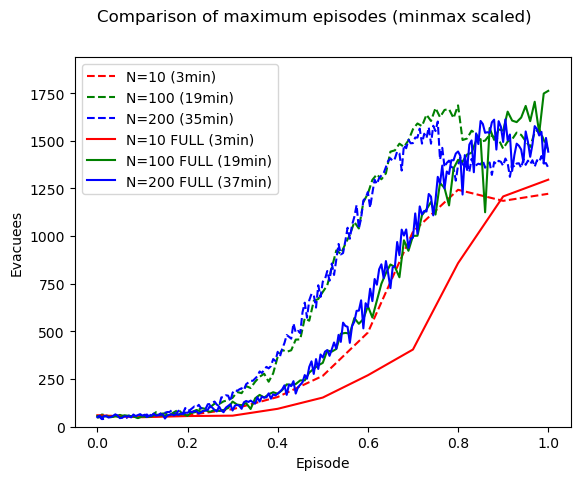

In [85]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# copy the data
# copy the data
df10_sklearn = df10.copy()
df100_sklearn = df100.copy()
df200_sklearn = df200.copy()

df10_f_sklearn = df10_f.copy()
df100_f_sklearn = df100_f.copy()
df200_f_sklearn = df200_f.copy()

# apply normalization techniques
for i in [0,1]:
    df10_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_sklearn[0]).reshape(-1,1))
    df100_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_sklearn[0]).reshape(-1,1))
    df200_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_sklearn[0]).reshape(-1,1))
    
    df10_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_f_sklearn[0]).reshape(-1,1))
    df100_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_f_sklearn[0]).reshape(-1,1))
    df200_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_f_sklearn[0]).reshape(-1,1))

#plot
fig, ax = plt.subplots()
fig.suptitle('Comparison of maximum episodes (minmax scaled)')
ax.plot(df10_sklearn[0], df10_sklearn[1], '--', c='r',label = 'N=10 (3min)')
ax.plot(df100_sklearn[0], df100_sklearn[1], '--', c='g', label= 'N=100 (19min)')
ax.plot(df200_sklearn[0], df200_sklearn[1], '--', c='b',label= 'N=200 (35min)')

ax.plot(df10_f_sklearn[0], df10_f_sklearn[1], '-', c='r',label = 'N=10 FULL (3min)')
ax.plot(df100_f_sklearn[0], df100_f_sklearn[1], '-', c='g',label = 'N=100 FULL (19min)')
ax.plot(df200_f_sklearn[0], df200_f_sklearn[1], '-', c='b',label = 'N=200 FULL (37min)')

ax.set_xlabel('Episode')
ax.set_ylabel('Evacuees')
ax.set_ylim(0,MAX_POP)
ax.legend()
plt.show()